Importing Libraries

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

Defining Convolutional Neural Network

In [3]:
# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.BatchNormalization())

# Second convolutional layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())

# Third convolutional layer
model.add(layers.Conv2D(64, (5,5), strides=2, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 batch_normalization_2 (Batc  (None, 10, 10, 64)       2

Importing and Normalizing Train/Test Data

In [4]:
# Split the data into training and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


Training Model

In [6]:
# Use the training data to train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=50,
          validation_split=1/7,
          verbose=1)

Epoch 1/50
515/515 [==============================] - 14s 26ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0895 - val_accuracy: 0.9927
Epoch 2/50
515/515 [==============================] - 13s 25ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0757 - val_accuracy: 0.9929
Epoch 3/50
515/515 [==============================] - 13s 25ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0846 - val_accuracy: 0.9925
Epoch 4/50
515/515 [==============================] - 14s 26ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0980 - val_accuracy: 0.9928
Epoch 5/50
515/515 [==============================] - 13s 25ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0972 - val_accuracy: 0.9910
Epoch 6/50
515/515 [==============================] - 13s 25ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1121 - val_accuracy: 0.9921
Epoch 7/50
515/515 [==============================] - 13s 25ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0900 - val_accuracy:

Test Model Accuracy & Visualize Results

In [27]:
# Test the model's accuracy with the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
predict_labels = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step - loss: 0.0887 - accuracy: 0.9924


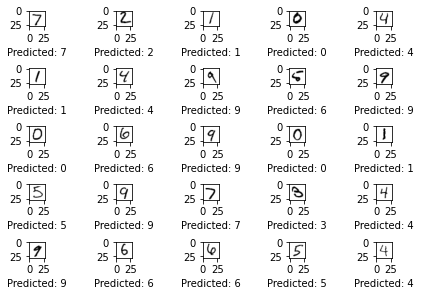

Test accuracy: 0.9923999905586243


In [47]:
# Plot test data images with predicted label
fig, axes = plt.subplots(5, 5, constrained_layout=True)
for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i].reshape((28,28)), cmap='binary')
  predict_label, actual_label = np.argmax(predict_labels[i]), np.argmax(test_labels[i])
  xlabel = f"Predicted: {predict_label}"
  ax.set_xlabel(xlabel)
plt.show()

print('Test accuracy:', test_acc)